✓ GroundingDINO model is loaded

Testing on: val0.jpg
final text_encoder_type: bert-base-uncased
final text_encoder_type: bert-base-uncased
✓ Model loaded for inference

Text Prompt: 'road sign . traffic sign . warning sign . speed limit . stop sign'
✓ Model loaded for inference

Text Prompt: 'road sign . traffic sign . warning sign . speed limit . stop sign'

✓ Detected 0 objects:

✓ Detected 0 objects:


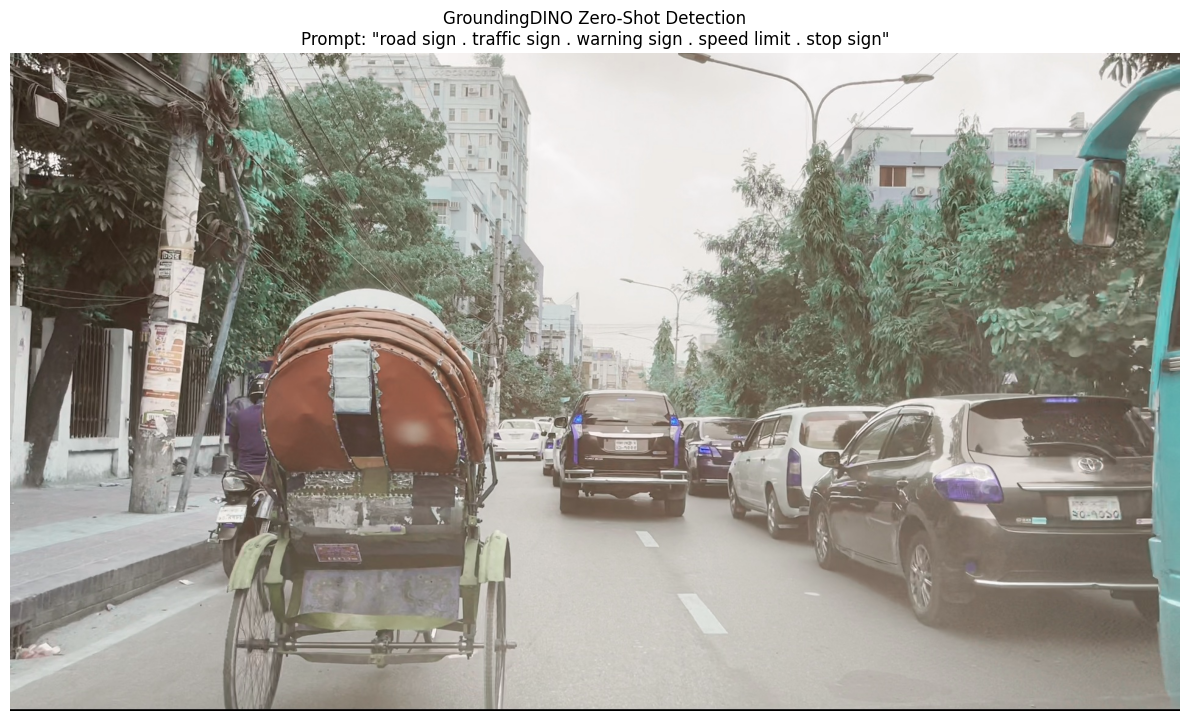


✓ GroundingDINO inference successful!

Try different text prompts:
  - "vehicle . car . truck . motorcycle"
  - "pedestrian . person . cyclist"
  - "road . lane . pavement . crosswalk"
  - "traffic light . red light . green light"

GroundingDINO Notes
• GroundingDINO is for ZERO-SHOT detection (no training)
• Use text prompts to detect objects
• Good for detecting objects not in training data
• For your thesis: YOLO is better (already trained)


In [11]:
# ========================
# GroundingDINO Inference on RSUD Dataset
# ========================
"""
This cell demonstrates how to use GroundingDINO for zero-shot detection
on your RSUD road sign images using text prompts.
"""

import torch
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Check if model is loaded
if 'gdino_model' not in dir():
    print("⚠ GroundingDINO model not loaded!")
    print("Please run the 'Load GroundingDINO Model' cell first")
else:
    print("✓ GroundingDINO model is loaded")
    
    # Get a test image from RSUD validation set
    test_img_dir = "F:/skills-copilot-codespaces-vscode/thesis/rsuddataset/rsud20k/images/val"
    test_images = [f for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.png'))]
    
    if test_images:
        test_img_path = os.path.join(test_img_dir, test_images[0])
        print(f"\nTesting on: {os.path.basename(test_img_path)}")
        
        # Check if model weights are loaded
        if os.path.exists(model_checkpoint_path):
            try:
                from groundingdino.util.inference import load_model, load_image, predict, annotate
                
                # Load model for inference
                config_file = "F:/skills-copilot-codespaces-vscode/thesis/gdino/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
                model = load_model(config_file, model_checkpoint_path)
                model = model.to(device)
                print("✓ Model loaded for inference")
                
                # Text prompts for RSUD road signs (zero-shot detection)
                TEXT_PROMPT = "road sign . traffic sign . warning sign . speed limit . stop sign"
                BOX_THRESHOLD = 0.35
                TEXT_THRESHOLD = 0.25
                
                print(f"\nText Prompt: '{TEXT_PROMPT}'")
                
                # Load and process image
                image_source, image = load_image(test_img_path)
                
                # Run detection
                boxes, logits, phrases = predict(
                    model=model,
                    image=image,
                    caption=TEXT_PROMPT,
                    box_threshold=BOX_THRESHOLD,
                    text_threshold=TEXT_THRESHOLD,
                    device=device
                )
                
                # Annotate image
                annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
                
                # Display results
                print(f"\n✓ Detected {len(boxes)} objects:")
                for phrase, logit in zip(phrases, logits):
                    print(f"  - {phrase}: {logit:.3f}")
                
                # Show image
                plt.figure(figsize=(12, 8))
                plt.imshow(annotated_frame)
                plt.axis('off')
                plt.title(f'GroundingDINO Zero-Shot Detection\nPrompt: "{TEXT_PROMPT}"')
                plt.tight_layout()
                plt.show()
                
                print("\n" + "="*60)
                print("✓ GroundingDINO inference successful!")
                print("="*60)
                print("\nTry different text prompts:")
                print('  - "vehicle . car . truck . motorcycle"')
                print('  - "pedestrian . person . cyclist"')
                print('  - "road . lane . pavement . crosswalk"')
                print('  - "traffic light . red light . green light"')
                print("="*60)
                
            except Exception as e:
                print(f"✗ Error during inference: {e}")
                print("\nMake sure you have:")
                print("  1. Downloaded the model weights")
                print("  2. Correct config path")
                print("  3. Installed groundingdino package")
        else:
            print(f"\n⚠ Model weights not found at: {model_checkpoint_path}")
            print("\nDownload weights from:")
            print("https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth")
            print(f"\nSave to: {model_checkpoint_path}")
    else:
        print(f"⚠ No test images found in {test_img_dir}")

print("\n" + "="*60)
print("GroundingDINO Notes")
print("="*60)
print("• GroundingDINO is for ZERO-SHOT detection (no training)")
print("• Use text prompts to detect objects")
print("• Good for detecting objects not in training data")
print("• For your thesis: YOLO is better (already trained)")
print("="*60)